## 1. Loading MNIST dataset

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


## 2. Preprocess Data Function

In [2]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

## 3. Define the model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))

  # The second fully connected layer 
  model.add(Dense(84, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model

## 4. Describe the model

In [4]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

## 5. Define the training functions

In [5]:
import matplotlib.pyplot as plt
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

## 6. Train Network

Epoch 1/10
468/468 [==============================] - 6s 12ms/step - loss: 1.2461 - accuracy: 0.6195 - val_loss: 38.6043 - val_accuracy: 0.9018
Epoch 2/10
468/468 [==============================] - 7s 15ms/step - loss: 0.2685 - accuracy: 0.9202 - val_loss: 23.2794 - val_accuracy: 0.9455
Epoch 3/10
468/468 [==============================] - 7s 15ms/step - loss: 0.1834 - accuracy: 0.9449 - val_loss: 19.1932 - val_accuracy: 0.9538
Epoch 4/10
468/468 [==============================] - 7s 14ms/step - loss: 0.1442 - accuracy: 0.9568 - val_loss: 15.0539 - val_accuracy: 0.9628
Epoch 5/10
468/468 [==============================] - 7s 14ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 15.4029 - val_accuracy: 0.9648
Epoch 6/10
468/468 [==============================] - 7s 14ms/step - loss: 0.1083 - accuracy: 0.9677 - val_loss: 12.6229 - val_accuracy: 0.9684
Epoch 7/10
468/468 [==============================] - 7s 14ms/step - loss: 0.0981 - accuracy: 0.9707 - val_loss: 10.7576 - val_accuracy:

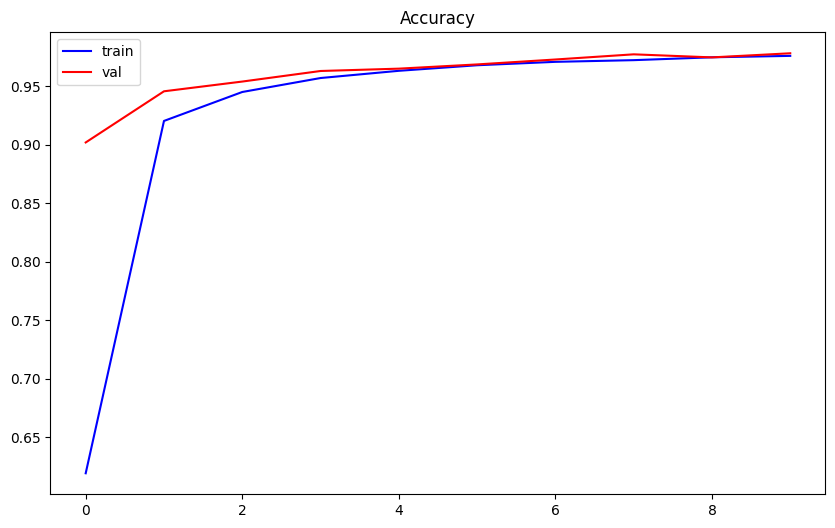

In [6]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)


## 7. Predict class

In [7]:
import numpy as np

# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
    img = X_test[i]
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    # one-hot vector output
    vec_p = LeNet_model.predict(img, verbose=0)  # Set verbose to 0 to suppress progress bars
    # determine the label corresponding to vector vec_p
    y_p = np.argmax(vec_p)
    y_test_pred.append(y_p)

# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

## 8. Plot confusion Matrix

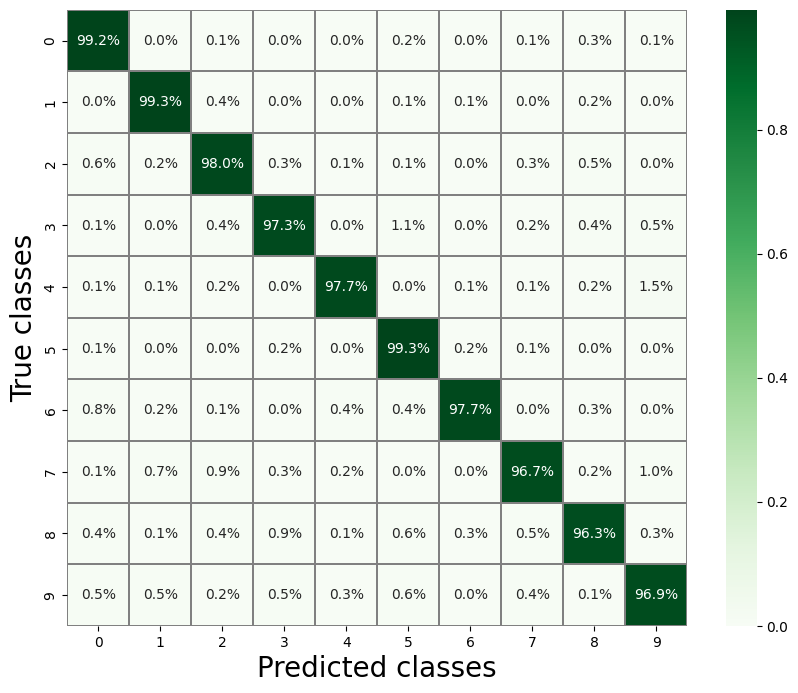

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

con_mat = confusion_matrix(y_test, y_test_pred, normalize='true')  # Use normalize='true'

plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, linewidths=0.1, cmap='Greens', linecolor='gray',
            fmt='.1%', annot=True)  # Use fmt='.1%' for percentage format
plt.xlabel('Predicted classes', fontsize=20)
plt.ylabel('True classes', fontsize=20)
plt.show()

## 9. Visualize some digits with predictions

1/1 [==============================] - 0s 12ms/step


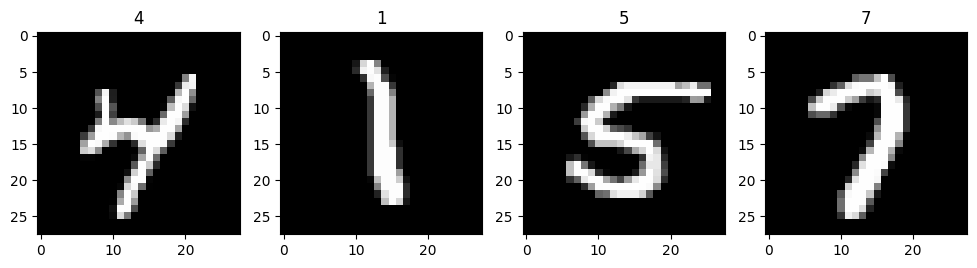

In [9]:
import random
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(12, 7))
for i in np.arange(4):
    ind = random.randint(0, len(X_test))
    img = X_test[ind]
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    predictions = LeNet_model.predict(img, verbose=0)
    predicted_class = np.argmax(predictions)
    plt.subplot(240 + 1 + i)
    plt.imshow(X_test[ind], cmap='gray')  # Assuming images are grayscale
    plt.title(cates[predicted_class])

plt.show()

## 10. Remove the C5:layer , F6:layer and connect S4:f feature maps (16@5x5) directly to the 10-class Softmax

In [10]:
def LeNetShort():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))

  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model

LeNetShort_model = LeNetShort()
LeNetShort_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

## 11. Retrain and predict

Epoch 1/10
468/468 [==============================] - 24s 52ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 11.1692 - val_accuracy: 0.9732
Epoch 2/10
468/468 [==============================] - 23s 49ms/step - loss: 0.0987 - accuracy: 0.9705 - val_loss: 11.1719 - val_accuracy: 0.9758
Epoch 3/10
468/468 [==============================] - 24s 51ms/step - loss: 0.0944 - accuracy: 0.9718 - val_loss: 11.3590 - val_accuracy: 0.9758
Epoch 4/10
468/468 [==============================] - 25s 54ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 10.2033 - val_accuracy: 0.9763
Epoch 5/10
468/468 [==============================] - 21s 44ms/step - loss: 0.0878 - accuracy: 0.9737 - val_loss: 9.6471 - val_accuracy: 0.9765
Epoch 6/10
468/468 [==============================] - 28s 60ms/step - loss: 0.0850 - accuracy: 0.9743 - val_loss: 9.7357 - val_accuracy: 0.9774
Epoch 7/10
468/468 [==============================] - 23s 49ms/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 9.4496 - val_accur

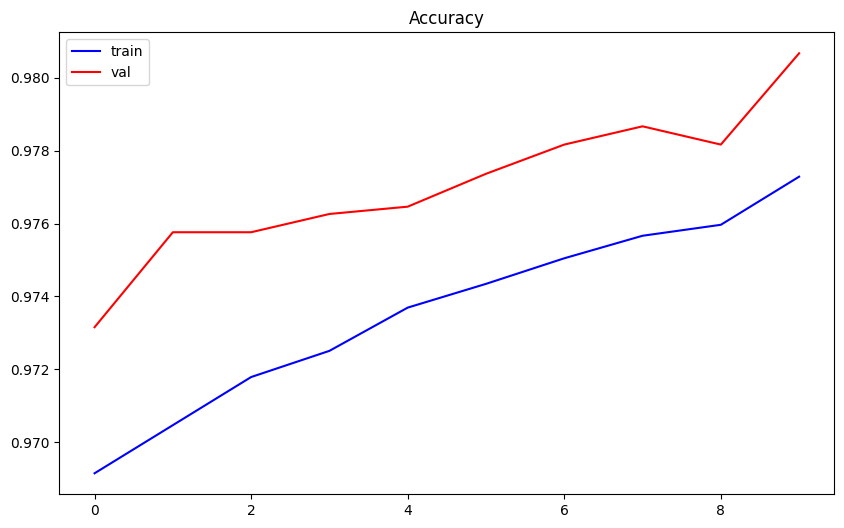

In [14]:
train_model(LeNetShort_model, X_train, y_train, X_test, y_test)

# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNetShort_model.predict(img, verbose=0)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)
  
# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

## 12. Replot Confusion Matrix

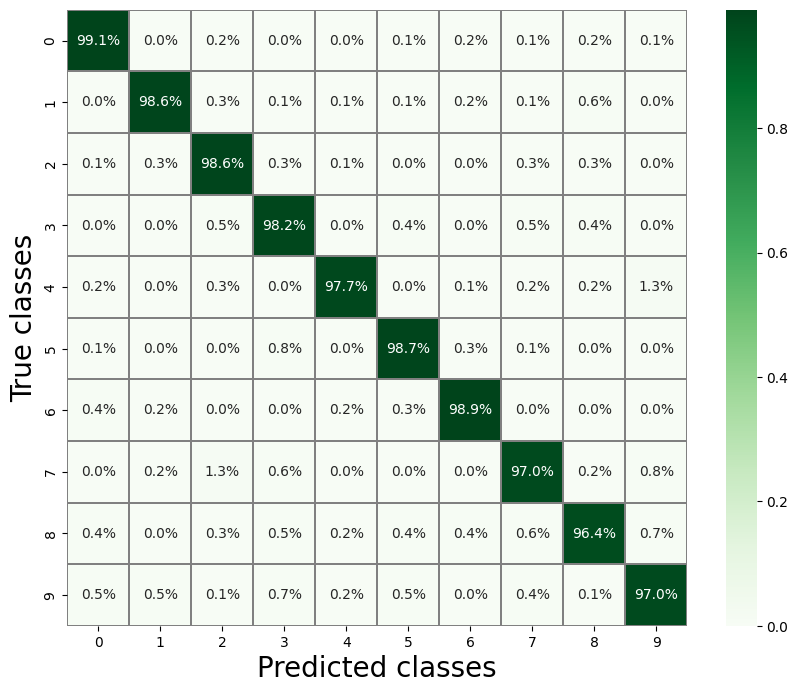

In [15]:
con_mat = confusion_matrix(y_test, y_test_pred, normalize='true')  # Use normalize='true'

plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, linewidths=0.1, cmap='Greens', linecolor='gray',
            fmt='.1%', annot=True)  # Use fmt='.1%' for percentage format
plt.xlabel('Predicted classes', fontsize=20)
plt.ylabel('True classes', fontsize=20)
plt.show()

## 13. Show some predictions for the short model

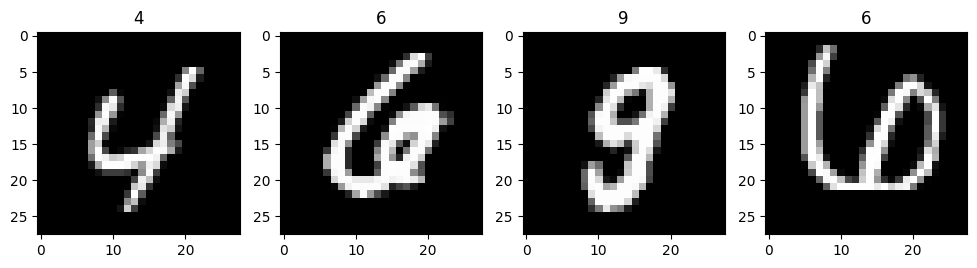

In [16]:
import random
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(12, 7))
for i in np.arange(4):
    ind = random.randint(0, len(X_test))
    img = X_test[ind]
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    predictions = LeNetShort_model.predict(img, verbose=0)
    predicted_class = np.argmax(predictions)
    plt.subplot(240 + 1 + i)
    plt.imshow(X_test[ind], cmap='gray')  # Assuming images are grayscale
    plt.title(cates[predicted_class])

plt.show()